In [77]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [78]:
def coleta_quotes(driver):
    quotes = driver.find_elements(By.CLASS_NAME, "quote")
    for q in quotes:
        textos = []
        text = q.find_element(By.CLASS_NAME, "text").text
        author = q.find_element(By.CLASS_NAME, "author").text
        textos.append (text)
        print(f"{text} -- {author}")
    return textos

In [83]:
options = webdriver.ChromeOptions()
options.add_argument("--headless")

driver = webdriver.Chrome(options)

driver.get("https://quotes.toscrape.com/")

textos = []
autores = []

while True:
    textos.extend(coleta_quotes(driver))
    try:
        next_button = driver.find_element(By.CSS_SELECTOR, 'li.next > a')
        next_button.click()
    except:
        break



“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.” -- Albert Einstein
“It is our choices, Harry, that show what we truly are, far more than our abilities.” -- J.K. Rowling
“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.” -- Albert Einstein
“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.” -- Jane Austen
“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.” -- Marilyn Monroe
“Try not to become a man of success. Rather become a man of value.” -- Albert Einstein
“It is better to be hated for what you are than to be loved for what you are not.” -- André Gide
“I have not failed. I've just found 10,000 ways that won't work.” -- Thomas A. Edison
“A woman is like a tea bag; you never know how strong it is until it's in hot water.” -- Ele

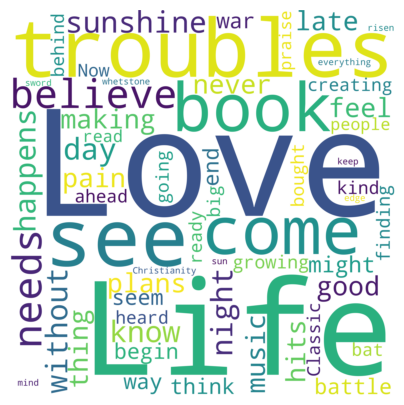

In [80]:
texto_unico = " ".join(textos)
stopwords = set(STOPWORDS)
stopwords.update(["said", "will", "one", "us"])  # opcional

wordcloud = WordCloud(width=5000, height=5000,
                      background_color="white",
                      stopwords=stopwords,
                      collocations=False).generate(texto_unico)

plt.figure(figsize=(5, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()